In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import pandas as pd


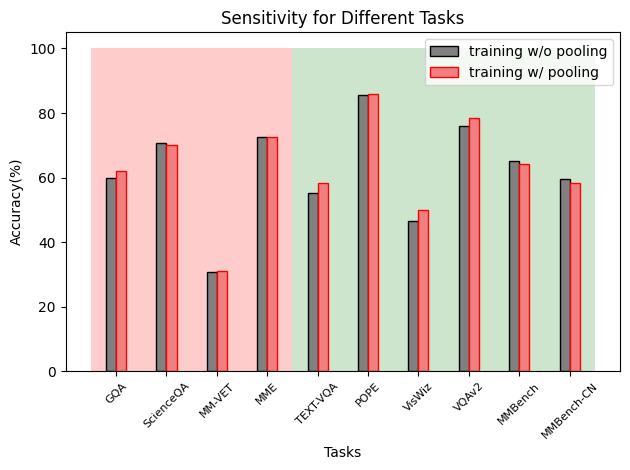

In [8]:

# 数据
#read task name from xlsx file
df = pd.read_excel('task_sensitivity.xlsx')
tasks = df['task'].tolist()
pool = df['pool'].tolist()
unpool = df['unpool'].tolist()
sensitive_num = 4

# 设置柱状图的宽度和位置
bar_width = 0.2
indices = np.arange(len(tasks)) * 5 * bar_width # 为了在任务之间有较大的间隔
insensitive_num = len(tasks) - sensitive_num
starting_x = -bar_width * 2.5
starting_y = 0

sensitive_width = (sensitive_num) * bar_width * 5
insensitive_width = (insensitive_num) * bar_width * 5
# 创建柱状图
fig, ax = plt.subplots()

# 拆分准确度
accuracy1 = [acc if acc < 200 else acc / 20 for acc in pool]
accuracy2 = [acc if acc < 200 else acc / 20 for acc in unpool]

ax.add_patch(patches.Rectangle((starting_x, starting_y), sensitive_width, 100, linewidth=0, 
                               facecolor='red', alpha=0.2))
ax.add_patch(patches.Rectangle((starting_x+sensitive_width, 0), insensitive_width, 100, linewidth=0, 
                               facecolor='green', alpha=0.2))




bar1 = ax.bar(indices - bar_width/2, accuracy1, bar_width, 
              color='gray', edgecolor='black', label='training w/o pooling')
bar2 = ax.bar(indices + bar_width/2, accuracy2, bar_width, 
              color='lightcoral', edgecolor='red', label='training w/ pooling')

# 添加任务名称作为横坐标标签
ax.set_xticks(indices)
ax.set_xticklabels(tasks)

# 横坐标标签 45度 字体缩小
plt.xticks(rotation=45, fontsize=8)

# 设置标签和标题
ax.set_xlabel('Tasks')
ax.set_ylabel('Accuracy(%)')
ax.set_title('Sensitivity for Different Tasks')

# 显示图例
ax.legend()
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# 显示图表
plt.savefig('figure.png',transparent=True)
plt.show()

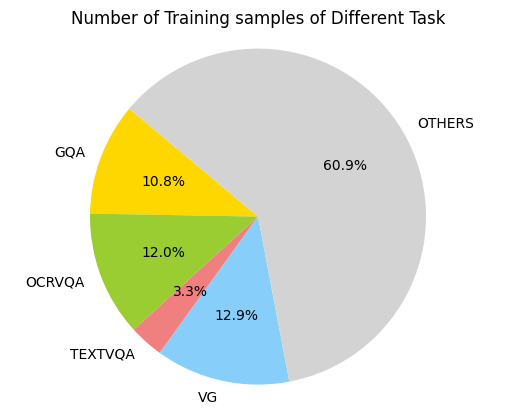

In [6]:
df = pd.read_excel('task_count.xlsx')
task = df['Task'].tolist()
counts = df['NUM'].tolist()

# 计算 OTHERS 的数量
total_count = 665000
others_count = total_count - sum(counts)
counts.append(others_count)
task.append('OTHERS')

# 绘制饼状图
fig, ax = plt.subplots()

# 指定颜色
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgray']

# 绘制饼图
ax.pie(counts, labels=task, colors=colors, autopct='%1.1f%%', startangle=140)

# 设置标题
ax.set_title('Number of Training samples of Different Task')

# 确保饼图是圆的
ax.axis('equal')

plt.savefig('count.png',transparent=True)